### Hypothesis Testing with Insurance Data
#### Laura Dimaria
8/3/22

In [32]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
insurance = pd.read_csv('/Users/lauradimaria/Downloads/insurance - insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Q1. Do smokers have higher insurance charges than non-smokers?

- Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers.

- Alternative Hypothesis: The insurance charges of smokers are higher than those of non-smokers.

#### Which test is appropriate?
- Type of Data? Numeric.
- How many groups/samples? 2, smokers and non smokers.
- Appropriate test? 2 sample T- Test

In [35]:
df = insurance[['smoker', 'charges']]
df.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


In [36]:
# Check value counts of smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [37]:
# Filters for smoker/nonsmoker
smoker_filter = df['smoker'] == 'yes'
nonsmoker_filter = df['smoker'] == 'no'

In [38]:
#DF for each
smoker_df = df[smoker_filter]
smoker_df.head()

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768


In [39]:
nonsmoker_df = df[nonsmoker_filter]
nonsmoker_df.head()

,smoker,charges
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
5,no,3756.62160


In [40]:
q1_plot = pd.concat([smoker_df, nonsmoker_df])
q1_plot

,smoker,charges
0,yes,16884.9240
11,yes,27808.7251
14,yes,39611.7577
19,yes,36837.4670
23,yes,37701.8768
...,...,...
1332,no,11411.6850
1333,no,10600.5483
1334,no,2205.9808
1335,no,1629.8335


#### Q1 Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

In [41]:
#Save numeric column
smoker_charges = smoker_df['charges']
nonsmoker_charges = nonsmoker_df['charges']

In [42]:
#Outliers on smoker column
smoker_outliers = np.abs(stats.zscore(smoker_charges))>3
smoker_outliers.value_counts()

False    274
Name: charges, dtype: int64

In [43]:
nonsmoker_outliers = np.abs(stats.zscore(nonsmoker_charges))>3
nonsmoker_outliers.value_counts()

False    1040
True       24
Name: charges, dtype: int64

In [44]:
#remove outliers from nonsmoker group
nonsmoker_charges = nonsmoker_charges[~nonsmoker_outliers]
nonsmoker_charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Q1- Test for Normality

In [45]:
smoker_result = stats.normaltest(smoker_charges)
smoker_result.pvalue < .05

True

In [46]:
nonsmoker_result = stats.normaltest(nonsmoker_charges)
nonsmoker_result.pvalue < .05

True

#### Test for Equal Variance

In [47]:
## Use Levene's test for equal variance
smoking_result = stats.levene(smoker_charges,nonsmoker_charges)
smoking_result
smoking_result.pvalue <.05

True

The groups DO NOT have equal variance

### Final Hypothesis Test

In [48]:
final_result = stats.ttest_ind(smoker_charges,nonsmoker_charges, equal_var=False)
final_result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

Our p-value is < alpha, we will reject the null hypothesis and support the alternative. The insurance charges of smokers are significantly higher than non smokers.

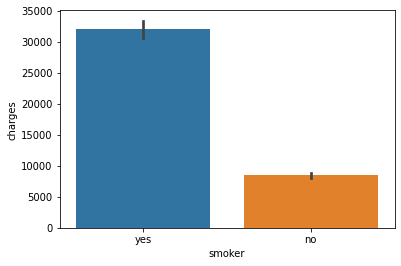

In [49]:
#Visualization
sns.barplot(data=q1_plot,x = 'smoker',y = 'charges');

### Q2. Are men more likely to smoke than women?

- Null Hypothesis: There is no difference the likelihood of smoking between men and women.
- Alternative Hypothesis: The likelihood of men smoking is higher than women.

#### Which test is appropriate?
- Type of Data? Categorical.
- How many groups/samples? 2 men and women.
- Appropriate test? Chi-Square

In [51]:
df = insurance[['sex', 'smoker']]
df.head()

,sex,smoker
0,female,yes
1,male,no
2,male,no
3,male,no
4,male,no


In [52]:
#contingency table using crosstab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [53]:
#run chi-squared test, save results
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result
#print p
print(p)
p<.05

0.006548143503580696


True

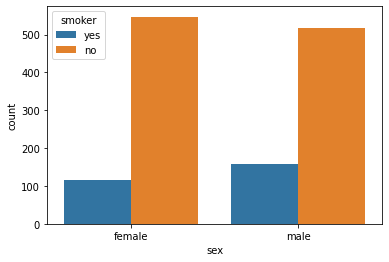

In [55]:
#Visualization
ax = sns.countplot(data= df, x='sex',hue='smoker');

### Conclusion
Since our pvalue < .05, we reject the null hypothesis and support the alternative. The likelihood of men smoking is higher than women.

### Q3. Do different regions have different charges, on average?

- Null Hypothesis: There is no difference in average insurance charges between regions.
- Alternative Hypothesis: On average, different regions do have different insurance charges.

#### Which test is appropriate?
- Type of Data? Numeric.
- How many groups/samples? More than 2.
- Appropriate test? ANOVA and/or Tukey


In [56]:
df = insurance[['region','charges']]
df.head()

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520


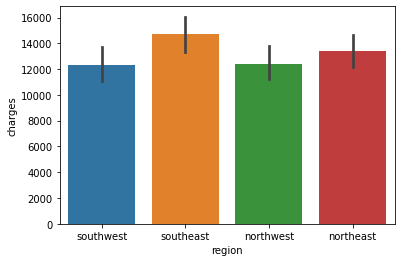

In [57]:
#Visualization
sns.barplot(data=df, x='region',y='charges');

In [59]:
#create empty dictionary and for loop
groups = {}
for i in df['region'].unique():
    data = df.loc[df['region']==i,'charges'].copy()
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [60]:
#normality test
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
#convert to df
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [61]:
#check sig
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [62]:
#Equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

In [63]:
#final hypothesis test

result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

### Conclusion
Our test had a pvalue < 0.05 so we will reject the null hypothesis. Different regions do, on average, have different charges.